<a href="https://colab.research.google.com/github/abhishek-marathe04/learning-pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Lets expore an example pytorch end to end workflow.

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn ## nn contains all building blocks for graphs
import matplotlib.pyplot as plt


# Check pytorch version
torch.__version__

'2.9.0+cpu'

## 1. Data (Preparing and loading)

Data can be almost anything.. in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data ...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is game of two parts
1. Get data into numberical representation
2. Build a model to learn patterns in that numerical representation

To Showcase this, lets create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.


In [4]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

In [6]:
### Splitting daa into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [7]:
len(X_train), len(X_test)

(40, 10)

In [8]:
len(y_train), len(y_test)

(40, 10)

Lets visualise our data

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")


  # Are there predictions?
  if predictions is not None:
    # Plot predictions if exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})


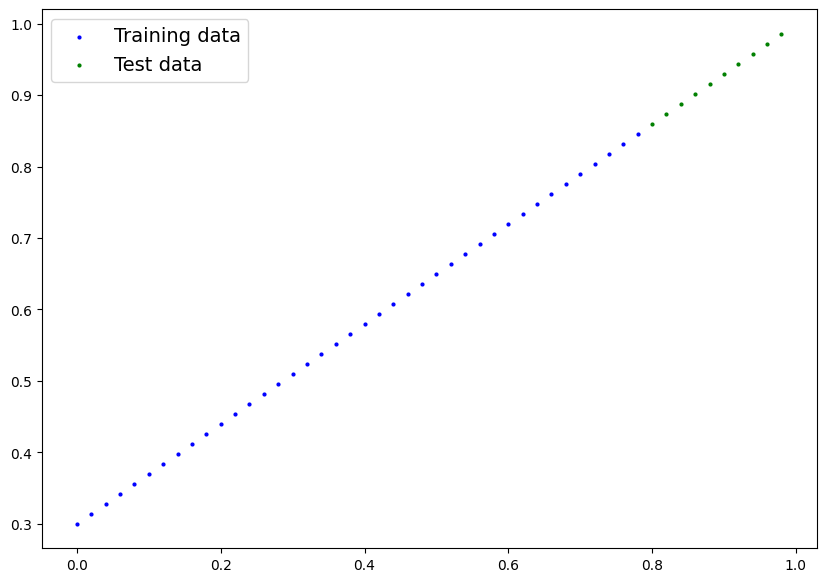

In [10]:
plot_predictions()

## Build Model

our first pytorch model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent the idea values

How does it do?

Using two alogrithms
1. Gradient discent
2. Back Propogation

In [11]:
from torch import nn
# Create a Linear regression model class

class LinearRegressionModel(nn.Module): # <- Almost everythin in pytorch inherit from nn Module
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.weights = nn.Parameter(torch.randn(1, # Start with random value
                                            requires_grad=True, # Requires gradient
                                            dtype=torch.float)) # Its default for pytorch
    self.bias = nn.Parameter(torch.randn(1,  # Start with random value
                                            requires_grad=True, # Requires gradient
                                            dtype=torch.float)) # Its default for pytorch

  # Forward method to define computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # This is linear regression formula


### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.*

> **Resource:** See more of these essential modules and their use cases in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html).

### Checking the contents of our pytorch model

Now we've createa a model, lets see whats inside...

We can check then using parameters()

In [12]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of model
model_0 = LinearRegressionModel()

# Check out the params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# We need to get closer to these values
weight, bias

(0.7, 0.3)

### Make predictions using `torch.inference_mode()`

to check our model's Predictive power, lets see how well it predicts y_test based on X_test
When we pass data through our model, its going to run through `forward()` method

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

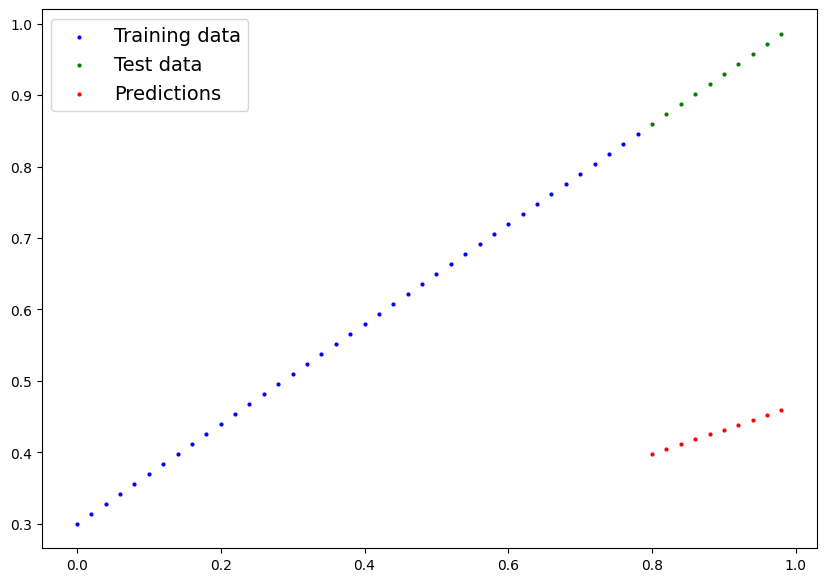

In [17]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The idea of training is for a model to move from some unknown parameters to some known parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

* Note : Loss function may also called as cost function or criterion in different areas.

Things we need to train :
* **Loss function:**  A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes in account the loss of a model and adjusts the model's parameters (weights and biases) to improve the loss function.

And specifically for pyTorch, We need:

* Training loop
* Testing loop

### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

* `params` is the target model parameters you'd like to optimize (e.g. the `weights` and `bias` values we randomly set before).
* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

Woah, that's a lot, let's see it in code.

In [18]:
# Setup a loss function
# We will do mean sqare error loss
# loss_fn = torch.mean(torch.abs(y_preds-y_test))
# Or we can directly use it from pytorch
loss_fn = nn.L1Loss()

# Setup an optimiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # Learning rate = Possibly the most important hypermarater you can set

### Building a trainging loop and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propogations
2. Calcuate the loss (Compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - Move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimiser step - Use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)



### PyTorch training loop
For the training loop, we'll build the following steps:

| Number | Step name | What does it do? | Code example |
| ----- | ----- | ----- | ----- |
| 1 | Forward pass | The model goes through all of the training data once, performing its `forward()` function calculations. | `model(x_train)` |
| 2 | Calculate the loss | The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. | `loss = loss_fn(y_pred, y_train)` |
| 3 | Zero gradients | The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. | `optimizer.zero_grad()` |
| 4 | Perform backpropagation on the loss | Computes the gradient of the loss with respect for every model parameter to be updated  (each parameter with `requires_grad=True`). This is known as **backpropagation**, hence "backwards".  | `loss.backward()` |
| 5 | Update the optimizer (**gradient descent**) | Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **Note:** The above is just one example of how the steps could be ordered or described. With experience you'll find making PyTorch training loops can be quite flexible.
>
> And on the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:
> * Calculate the loss (`loss = ...`) *before* performing backpropagation on it (`loss.backward()`).
> * Zero gradients (`optimizer.zero_grad()`) *before* computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
> * Step the optimizer (`optimizer.step()`) *after* performing backpropagation on the loss (`loss.backward()`).

For resources to help understand what's happening behind the scenes with backpropagation and gradient descent, see the extra-curriculum section.


In [19]:
# # An epoch is one loop through the data...
# epochs = 20

# # Loop through the data
# for epoch in range(epochs):
#   # Set the model to training model
#   model_0.train() # Train mode in pyTorch sets all parameters that require gradients to require grads

#   # 1. Forward pass
#   y_pred = model_0(X_train)

#   # 2. Calculate Loss function
#   loss = loss_fn(y_pred, y_train)
#   print(f"Loss : {loss}")

#   # 3. Optimizer zero grad
#   optimizer.zero_grad()

#   # 4. Perform backpropogration on the loss with the respect to the parameters of the model
#   loss.backward()

#   # 5. Step the optimiser (perform gradient descent)
#   optimizer.step()
#   print(f"Model Parameters : {model_0.state_dict()}")



In [20]:
# # Lets try making some predictions using our model

# with torch.inference_mode():
#   y_preds = model_0(X_test)

# y_preds

In [21]:
# plot_predictions(predictions=y_preds)

In [22]:
# An epoch is one loop through the data...
epochs = 180

# Track counts
epoch_counts = []
loss_values = []
test_loss_values = []

# Loop through the data
for epoch in range(epochs):
  # Set the model to training model
  model_0.train() # Train mode in pyTorch sets all parameters that require gradients to require grads

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate Loss function
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss : {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogration on the loss with the respect to the parameters of the model
  loss.backward()

  # 5. Step the optimiser (perform gradient descent)
  optimizer.step()


  ### Testing
  model_0.eval() # Turns of different settings in model not needed for evaluation/testing
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate Loss function
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss : {loss}  | Test Loss : {test_loss}")

    print(f"Model Parameters : {model_0.state_dict()}")


Epoch: 0 | Loss : 0.31288138031959534  | Test Loss : 0.48106518387794495
Model Parameters : OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss : 0.1976713240146637  | Test Loss : 0.3463551998138428
Model Parameters : OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss : 0.08908725529909134  | Test Loss : 0.21729660034179688
Model Parameters : OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss : 0.053148526698350906  | Test Loss : 0.14464017748832703
Model Parameters : OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss : 0.04543796554207802  | Test Loss : 0.11360953003168106
Model Parameters : OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss : 0.04167863354086876  | Test Loss : 0.09919948130846024
Model Parameters : OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss : 0.038189329

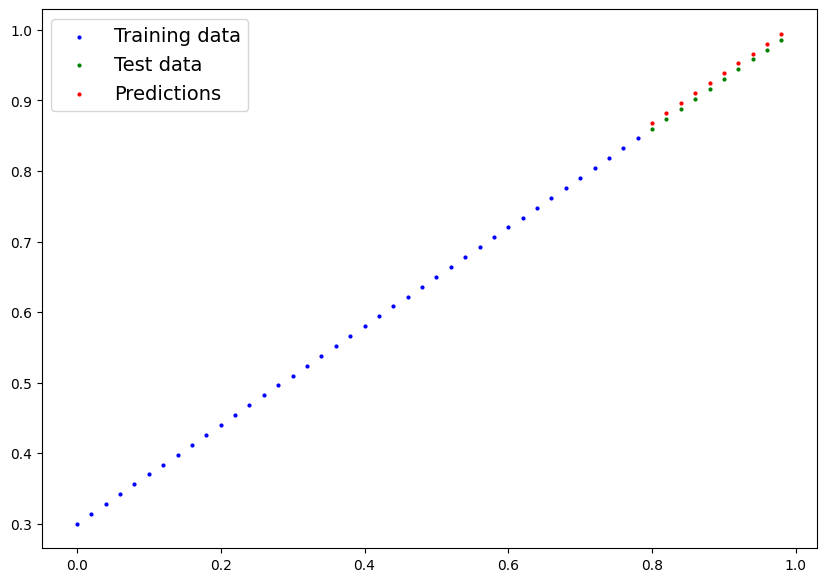

In [23]:
# Lets try making some predictions using our model

with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [24]:
epoch_counts, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
 

/tmp/ipython-input-3735070421.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Train loss")


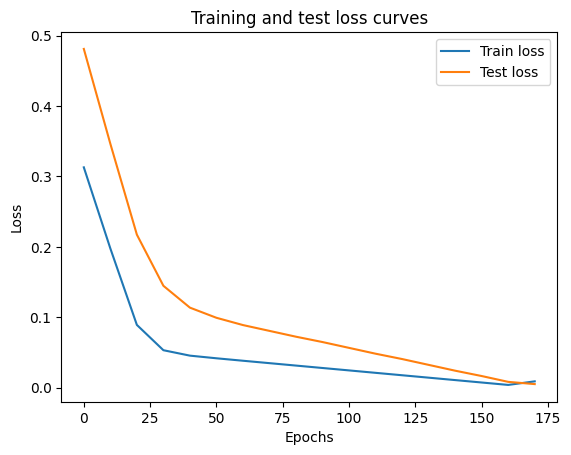

In [25]:
import numpy as np
# Lets plot our tracking values
plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - Allows you to save pytorch object in python pick format
2. `torch.load()` - Allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictnary

In [26]:
# Saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [27]:
# Load our saved model
loaded_model_0 = LinearRegressionModel()

# This will fetch state dict from saved model
# saved_model =

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=False))

<All keys matched successfully>

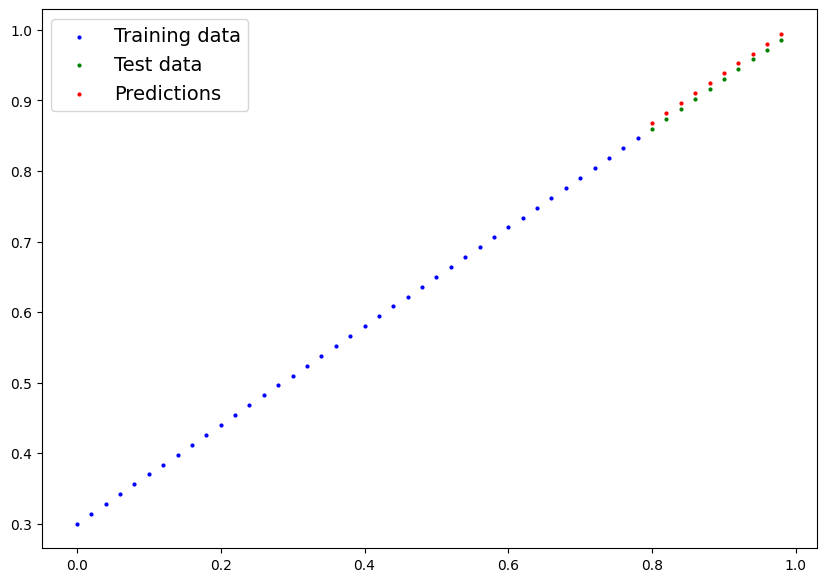

In [28]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_pred = model_0(X_test)

plot_predictions(predictions=loaded_model_pred)

### 6. Putting it all together


In [29]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

In [30]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device {device}")

Using Device cpu


### 6.1 Data

In [70]:
# Creating sample data for Linear regression model
w = 7
b = 3
split_ratio = 0.8

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

Y = (w * X) + b
X, Y


# Splitting data into train and testing set
train_split = int(len(X) * split_ratio)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



In [71]:
# Creating function to visualize our data
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, color="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, color="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, color="r", label="Predictions")

  plt.legend(prop={"size": 14})

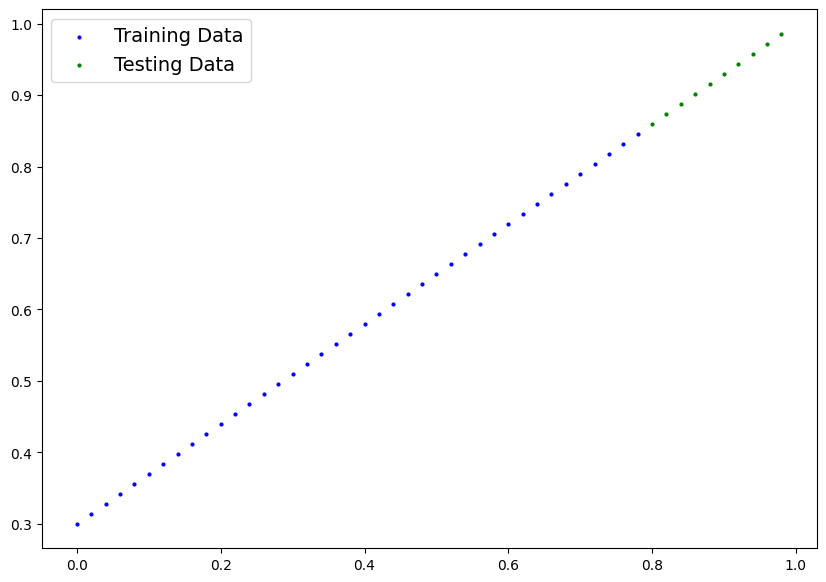

In [72]:
plot_predictions()

In [73]:
# Build a model

class LinearRegressionModel(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [90]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

In [91]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [92]:
# Try predictions using random weight and bias
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

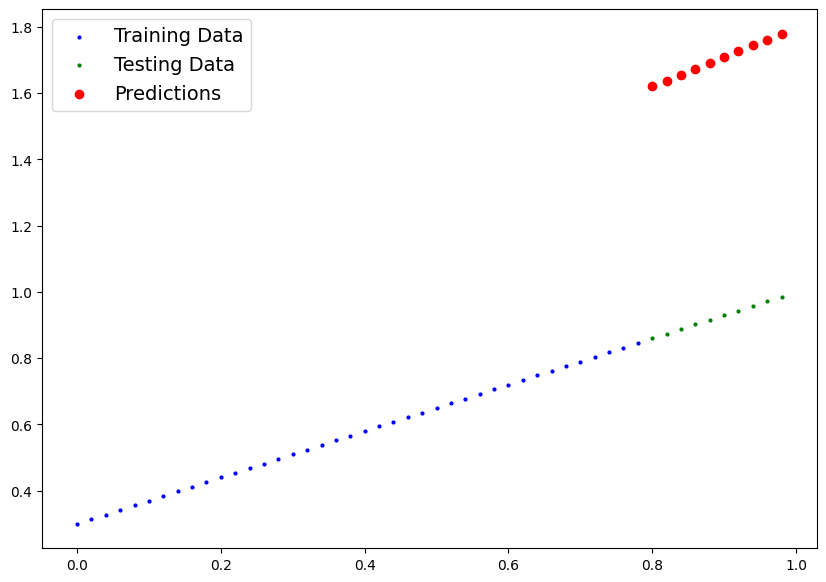

In [93]:
plot_predictions(predictions=y_pred)

In [94]:
#Define loss function and optimiser


loss_fn = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [95]:
# Train Model

epochs = 180

# Track counts and values
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # Set model to train
  model_1.train()

  # Make predictions using traing set
  y_pred = model_1(X_train)

  # Calcuate loss
  loss = loss_fn(y_pred, y_train)

  # Zero grad
  optimiser.zero_grad()

  # Backpropogation
  loss.backward()

  # Update parameters
  optimiser.step()

  with torch.inference_mode():
    # Test model
    y_preds_new = model_1(X_test)

    # Check testing loss
    test_loss = loss_fn(y_preds_new, y_test)

  if epoch % 10 == 0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f" Loss {loss}, Model weights : {model_1.state_dict()}, Test Loss: {test_loss}")



 Loss 0.6860889196395874, Model weights : OrderedDict({'weights': tensor([0.8784]), 'bias': tensor([0.9050])}), Test Loss: 0.7637526988983154
 Loss 0.5708791017532349, Model weights : OrderedDict({'weights': tensor([0.8394]), 'bias': tensor([0.8050])}), Test Loss: 0.6290428042411804
 Loss 0.45566922426223755, Model weights : OrderedDict({'weights': tensor([0.8004]), 'bias': tensor([0.7050])}), Test Loss: 0.4943329691886902
 Loss 0.34045934677124023, Model weights : OrderedDict({'weights': tensor([0.7614]), 'bias': tensor([0.6050])}), Test Loss: 0.35962313413619995
 Loss 0.2252494841814041, Model weights : OrderedDict({'weights': tensor([0.7224]), 'bias': tensor([0.5050])}), Test Loss: 0.2249133139848709
 Loss 0.1100396141409874, Model weights : OrderedDict({'weights': tensor([0.6834]), 'bias': tensor([0.4050])}), Test Loss: 0.09020347893238068
 Loss 0.009724985808134079, Model weights : OrderedDict({'weights': tensor([0.6539]), 'bias': tensor([0.3200])}), Test Loss: 0.02099801972508430

In [96]:
# Try predictions with trained model
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

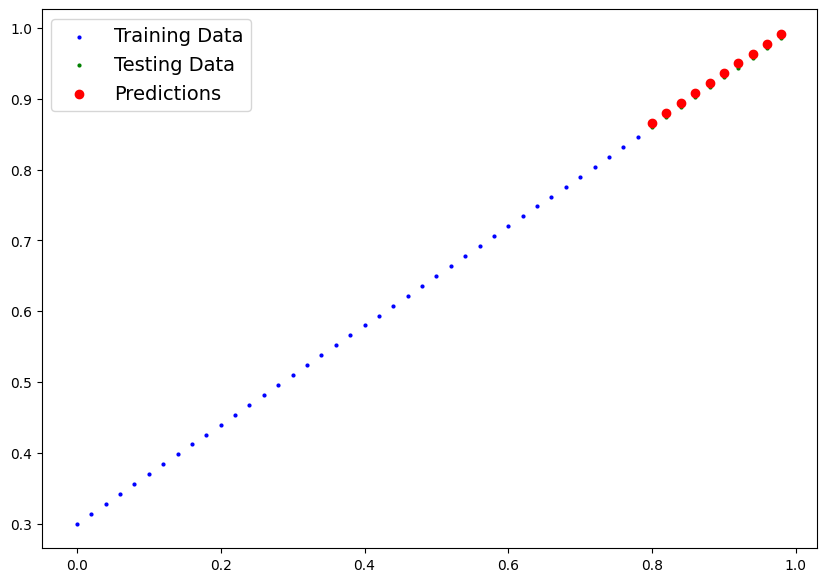

In [97]:
plot_predictions(predictions=y_pred)

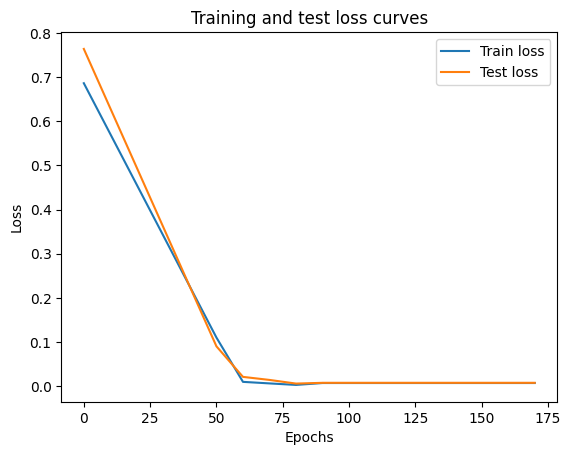

In [103]:
# Visualise model performance
import matplotlib.pyplot as plt

plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# plt.plot(epoch_counts, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
# plt.plot(epoch_counts, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
# plt.title("Training and test loss curves")
# plt.ylabel("Loss")
# plt.xlabel("Epochs")
# plt.legend()
